In [1]:
from GlucoCheck.glucoCheck import glucoCheckOps
import pandas as pd
import random
import numpy as np
from tqdm.auto import tqdm

from scipy import stats

import random
import re
from dateutil.parser import parse

import warnings  
warnings.filterwarnings('ignore')

import os


Using TensorFlow backend.


In [2]:
def createGap(df,start,end):
    """
    Creating a Gap
    input:
        start: seed
        end: seed + gap
    output:
        df: dataframe with index => DisplayTime value => GlucoseValues and a gap from start to end (inputs)
    """

    #df = readData()
    l = len(df.index)
    if end>l:
        end = l
        
    for i in range(start,end):
        df['GlucoseValue'][i]=0
    
    return df

In [3]:
#Extract Data
data = pd.read_csv("~/Desktop/NCSA_genomics/Python - notebooks/GlucoCheck/Data/Ohio-Data/OhioFullConsolidated.csv")


In [4]:
data = data[data['subjectId']=='OD552']
data = data.reset_index(drop=True)

In [5]:
# data.drop(['subjectId'], axis=1, inplace=True)
# data['Display Time'] = data['Display Time'].apply(lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
# data = data.set_index(['Display Time'], drop=True)
# data.to_csv("~/Desktop/original.csv")
data


,subjectId,Display Time,GlucoseValue
0,OD552,4/16/25 11:17,95
1,OD552,4/16/25 11:22,86
2,OD552,4/16/25 11:27,81
3,OD552,4/16/25 11:32,81
4,OD552,4/16/25 11:37,82
...,...,...,...
11439,OD552,6/7/25 16:49,238
11440,OD552,6/7/25 16:54,233
11441,OD552,6/7/25 16:59,229
11442,OD552,6/7/25 17:04,224


In [6]:
obj = glucoCheckOps()

Object Created!


In [61]:
# pd.read_csv("~/Desktop/NCSA_genomics/Python - notebooks/GlucoCheck/Data/Ohio-Data/OhioFullConsolidated.csv")
fullData = pd.read_csv("~/Desktop/NCSA_genomics/Python - notebooks/GlucoCheck/Data/Ohio-Data/OhioFullConsolidated.csv")
fullData = fullData.reset_index(drop=True)

In [62]:
fullData

,subjectId,Display Time,GlucoseValue
0,OD570,12/7/21 16:29,101
1,OD570,12/7/21 16:34,100
2,OD570,12/7/21 16:39,100
3,OD570,12/7/21 16:44,99
4,OD570,12/7/21 16:49,98
...,...,...,...
166528,OD552,6/7/25 16:49,238
166529,OD552,6/7/25 16:54,233
166530,OD552,6/7/25 16:59,229
166531,OD552,6/7/25 17:04,224


In [63]:
obj.train(fullData)

Model trained successfully!


In [121]:

seed_points = [10990,11050,11110,11199,11208]

In [122]:
#for gap size 100
ioa_gap100 = list()
fb_gap100 = list()
mad_gap100 = list()
rmse_gap100 = list()
mape_gap100 = list()

for seed in tqdm(seed_points):
    start = seed
    end = seed+99
    data_with_missing = data.copy()
    data_with_missing = createGap(data_with_missing,start,end)

    imputed_data = obj.impute(data_with_missing,1)

    mad = obj.mad(np.asarray(imputed_data['GlucoseValue'][start:end-1].tolist()),np.asarray(data['GlucoseValue'][start:end-1].tolist()))
    ioa = obj.index_agreement(np.asarray(imputed_data['GlucoseValue'][start:end-1].tolist()),np.asarray(data['GlucoseValue'][start:end-1].tolist()))
    fb = obj.fracBias(np.asarray(imputed_data['GlucoseValue'][start:end-1].tolist()),np.asarray(data['GlucoseValue'][start:end-1].tolist()))
    rmse = obj.rmse(np.asarray(imputed_data['GlucoseValue'][start:end-1].tolist()),np.asarray(data['GlucoseValue'][start:end-1].tolist()))
    mape = obj.mape(np.asarray(imputed_data['GlucoseValue'][start:end-1].tolist()),np.asarray(data['GlucoseValue'][start:end-1].tolist()))

    mad_gap100.append(mad)
    ioa_gap100.append(ioa)
    fb_gap100.append(fb)
    rmse_gap100.append(rmse)
    mape_gap100.append(mape)



In [123]:
#for gap size 50
ioa_gap50 = list()
fb_gap50 = list()
mad_gap50 = list()
rmse_gap50 = list()
mape_gap50 = list()

for seed in tqdm(seed_points):
    start = seed
    end = seed+49
    data_with_missing = data.copy()
    data_with_missing = createGap(data_with_missing,start,end)

    imputed_data = obj.impute(data_with_missing,1)

    mad = obj.mad(np.asarray(imputed_data['GlucoseValue'][start:end-1].tolist()),np.asarray(data['GlucoseValue'][start:end-1].tolist()))
    ioa = obj.index_agreement(np.asarray(imputed_data['GlucoseValue'][start:end-1].tolist()),np.asarray(data['GlucoseValue'][start:end-1].tolist()))
    fb = obj.fracBias(np.asarray(imputed_data['GlucoseValue'][start:end-1].tolist()),np.asarray(data['GlucoseValue'][start:end-1].tolist()))
    rmse = obj.rmse(np.asarray(imputed_data['GlucoseValue'][start:end-1].tolist()),np.asarray(data['GlucoseValue'][start:end-1].tolist()))
    mape = obj.mape(np.asarray(imputed_data['GlucoseValue'][start:end-1].tolist()),np.asarray(data['GlucoseValue'][start:end-1].tolist()))

    mad_gap50.append(mad)
    ioa_gap50.append(ioa)
    fb_gap50.append(fb)
    rmse_gap50.append(rmse)
    mape_gap50.append(mape)



In [124]:
#for gap size 30
ioa_gap30 = list()
fb_gap30 = list()
mad_gap30 = list()
rmse_gap30 = list()
mape_gap30 = list()

for seed in tqdm(seed_points):
    start = seed
    end = start+29
    data_with_missing = data.copy()
    data_with_missing = createGap(data_with_missing,start,end)

    imputed_data = obj.impute(data_with_missing,1)

    mad = obj.mad(np.asarray(imputed_data['GlucoseValue'][start:end-1].tolist()),np.asarray(data['GlucoseValue'][start:end-1].tolist()))
    ioa = obj.index_agreement(np.asarray(imputed_data['GlucoseValue'][start:end-1].tolist()),np.asarray(data['GlucoseValue'][start:end-1].tolist()))
    fb = obj.fracBias(np.asarray(imputed_data['GlucoseValue'][start:end-1].tolist()),np.asarray(data['GlucoseValue'][start:end-1].tolist()))
    rmse = obj.rmse(np.asarray(imputed_data['GlucoseValue'][start:end-1].tolist()),np.asarray(data['GlucoseValue'][start:end-1].tolist()))
    mape = obj.mape(np.asarray(imputed_data['GlucoseValue'][start:end-1].tolist()),np.asarray(data['GlucoseValue'][start:end-1].tolist()))

    mad_gap30.append(mad)
    ioa_gap30.append(ioa)
    fb_gap30.append(fb)
    rmse_gap30.append(rmse)
    mape_gap30.append(mape)



In [125]:
#for gap size 15
ioa_gap15 = list()
fb_gap15 = list()
mad_gap15 = list()
rmse_gap15 = list()
mape_gap15 = list()

for seed in tqdm(seed_points):
    start = seed
    end = start+14
    data_with_missing = data.copy()
    data_with_missing = createGap(data_with_missing,start,end)

    imputed_data = obj.impute(data_with_missing,1)

    mad = obj.mad(np.asarray(imputed_data['GlucoseValue'][start:end-1].tolist()),np.asarray(data['GlucoseValue'][start:end-1].tolist()))
    ioa = obj.index_agreement(np.asarray(imputed_data['GlucoseValue'][start:end-1].tolist()),np.asarray(data['GlucoseValue'][start:end-1].tolist()))
    fb = obj.fracBias(np.asarray(imputed_data['GlucoseValue'][start:end-1].tolist()),np.asarray(data['GlucoseValue'][start:end-1].tolist()))
    rmse = obj.rmse(np.asarray(imputed_data['GlucoseValue'][start:end-1].tolist()),np.asarray(data['GlucoseValue'][start:end-1].tolist()))
    mape = obj.mape(np.asarray(imputed_data['GlucoseValue'][start:end-1].tolist()),np.asarray(data['GlucoseValue'][start:end-1].tolist()))

    mad_gap15.append(mad)
    ioa_gap15.append(ioa)
    fb_gap15.append(fb)
    rmse_gap15.append(rmse)
    mape_gap15.append(mape)

    

In [126]:
#for gap size 5
ioa_gap5 = list()
fb_gap5 = list()
mad_gap5 = list()
rmse_gap5 = list()
mape_gap5 = list()

for seed in tqdm(seed_points):
    start = seed
    end = start+4
    data_with_missing = data.copy()
    data_with_missing = createGap(data_with_missing,start,end)

    imputed_data = obj.impute(data_with_missing,1)

    mad = obj.mad(np.asarray(imputed_data['GlucoseValue'][start:end-1].tolist()),np.asarray(data['GlucoseValue'][start:end-1].tolist()))
    ioa = obj.index_agreement(np.asarray(imputed_data['GlucoseValue'][start:end-1].tolist()),np.asarray(data['GlucoseValue'][start:end-1].tolist()))
    fb = obj.fracBias(np.asarray(imputed_data['GlucoseValue'][start:end-1].tolist()),np.asarray(data['GlucoseValue'][start:end-1].tolist()))
    rmse = obj.rmse(np.asarray(imputed_data['GlucoseValue'][start:end-1].tolist()),np.asarray(data['GlucoseValue'][start:end-1].tolist()))
    mape = obj.mape(np.asarray(imputed_data['GlucoseValue'][start:end-1].tolist()),np.asarray(data['GlucoseValue'][start:end-1].tolist()))

    mad_gap5.append(mad)
    ioa_gap5.append(ioa)
    fb_gap5.append(fb)
    rmse_gap5.append(rmse)
    mape_gap5.append(mape)



In [127]:
IOA = pd.DataFrame({'Gap:5':ioa_gap5, 'Gap:15':ioa_gap15, 'Gap:30':ioa_gap30, 'Gap:50':ioa_gap50,'Gap:100':ioa_gap100})
IOA


,Gap:5,Gap:15,Gap:30,Gap:50,Gap:100
0,0.475248,0.453916,0.319875,0.475964,0.429539
1,0.077369,0.227582,0.734335,0.440854,0.587769
2,0.327869,0.503874,0.583719,0.584878,0.600314
3,0.284153,0.484870,0.875514,0.952714,0.850313
4,0.690749,0.983056,0.992466,0.966034,0.808447


In [128]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [129]:
# IOA

In [131]:
gaps = [5,15,30,50,100]
ioa = []
ioa.append(IOA['Gap:5'].mean())
ioa.append(IOA['Gap:15'].mean())
ioa.append(IOA['Gap:30'].mean())
ioa.append(IOA['Gap:50'].mean())
ioa.append(IOA['Gap:100'].mean())
ioa

[0.37107754408519095,
 0.5306596177405669,
 0.7011815931580399,
 0.6840887504136014,
 0.6552766834062994]

Text(0, 0.5, 'IOA value')

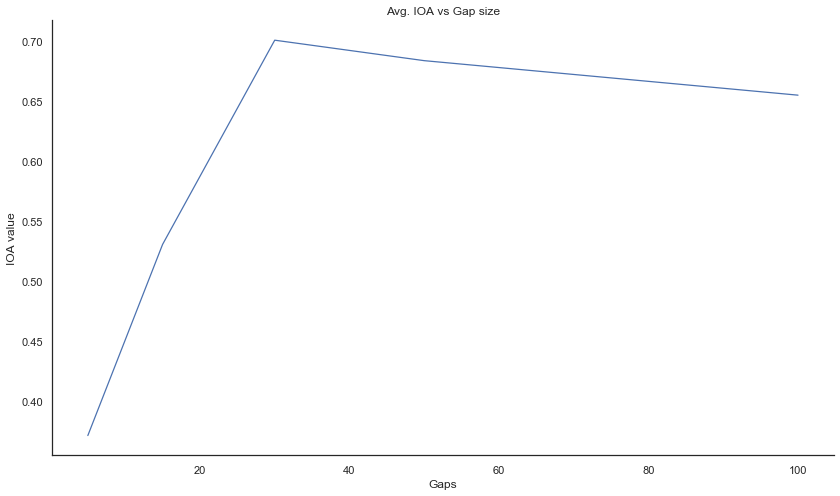

In [132]:
plt.figure(figsize=(14,8))
plt.title("Avg. IOA vs Gap size")
sns.set(style="white")
fig = sns.lineplot(x = gaps, y = ioa, palette="tab10", linewidth=1.25)
sns.despine()

fig.set_xlabel('Gaps')
fig.set_ylabel('IOA value')

Text(0, 0.5, 'IOA value')

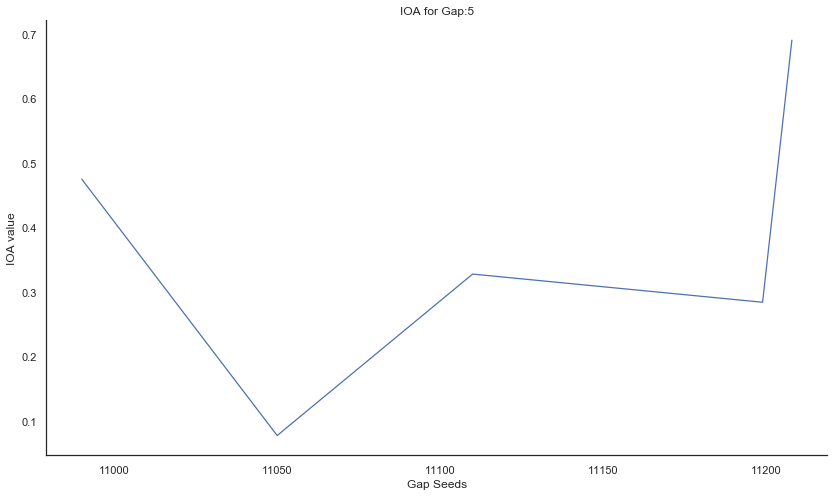

In [133]:

plt.figure(figsize=(14,8))
plt.title("IOA for Gap:5")
sns.set(style="white")
fig = sns.lineplot(x = seed_points, y = IOA['Gap:5'], data = IOA, palette="tab10", linewidth=1.25)
sns.despine()

fig.set_xlabel('Gap Seeds')
fig.set_ylabel('IOA value')

Text(0, 0.5, 'IOA value')

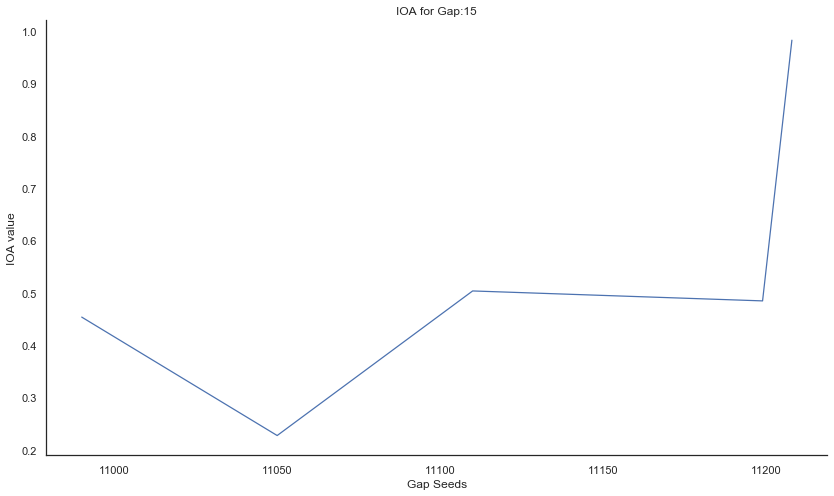

In [134]:

plt.figure(figsize=(14,8))
plt.title("IOA for Gap:15")
sns.set(style="white")
fig = sns.lineplot(x = seed_points, y = IOA['Gap:15'], data = IOA, palette="tab10", linewidth=1.25)
sns.despine()

fig.set_xlabel('Gap Seeds')
fig.set_ylabel('IOA value')

Text(0, 0.5, 'IOA value')

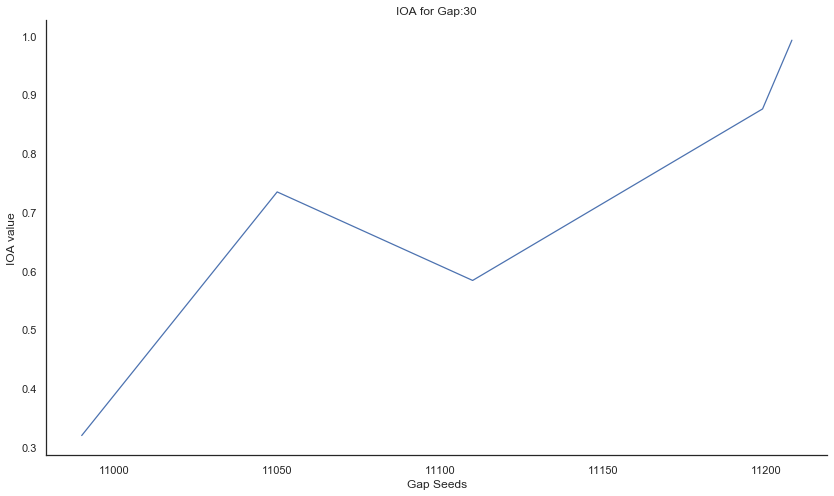

In [135]:

plt.figure(figsize=(14,8))
plt.title("IOA for Gap:30")
sns.set(style="white")
fig = sns.lineplot(x = seed_points, y = IOA['Gap:30'], data = IOA, palette="tab10", linewidth=1.25)
sns.despine()

fig.set_xlabel('Gap Seeds')
fig.set_ylabel('IOA value')

Text(0, 0.5, 'IOA value')

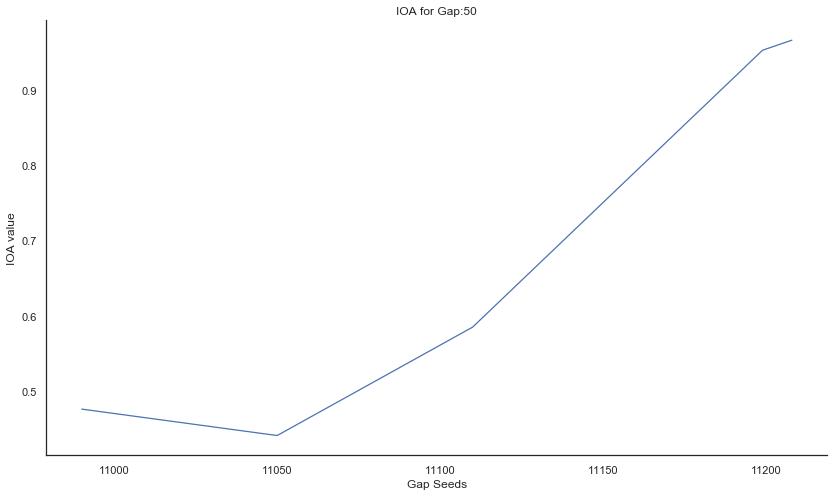

In [136]:

plt.figure(figsize=(14,8))
plt.title("IOA for Gap:50")
sns.set(style="white")
fig = sns.lineplot(x = seed_points, y = IOA['Gap:50'], data = IOA, palette="tab10", linewidth=1.25)
sns.despine()

fig.set_xlabel('Gap Seeds')
fig.set_ylabel('IOA value')

Text(0, 0.5, 'IOA value')

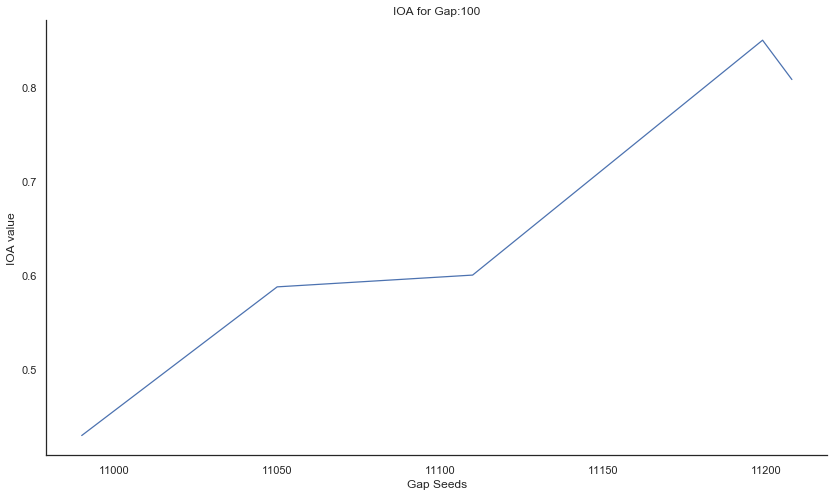

In [137]:

plt.figure(figsize=(14,8))
plt.title("IOA for Gap:100")
sns.set(style="white")
fig = sns.lineplot(x = seed_points, y = IOA['Gap:100'], data = IOA, palette="tab10", linewidth=1.25)
sns.despine()
fig.set_xlabel('Gap Seeds')
fig.set_ylabel('IOA value')

In [138]:
MAD = pd.DataFrame({'Gap:5':mad_gap5, 'Gap:15':mad_gap15, 'Gap:30':mad_gap30, 'Gap:50':mad_gap50, 'Gap:100':mad_gap100})
MAD

,Gap:5,Gap:15,Gap:30,Gap:50,Gap:100
0,3.000000,11.230769,16.214286,30.208333,44.163265
1,3.666667,11.692308,17.000000,30.541667,34.438776
2,3.000000,13.307692,40.285714,45.187500,89.459184
3,15.666667,31.692308,27.357143,18.625000,33.040816
4,4.666667,5.307692,5.071429,9.458333,27.469388


In [139]:
FB = pd.DataFrame({'Gap:5':fb_gap5, 'Gap:15':fb_gap15, 'Gap:30':fb_gap30, 'Gap:50':fb_gap50, 'Gap:100':fb_gap100})
FB

,Gap:5,Gap:15,Gap:30,Gap:50,Gap:100
0,0.019488,0.070604,0.113353,0.231264,0.357808
1,0.043914,0.128076,0.168665,0.272745,0.294568
2,0.039331,0.131501,0.326147,0.344957,0.486606
3,0.053860,0.117162,0.115180,0.083971,0.207565
4,0.016994,0.021815,0.025364,0.056876,0.189024


In [140]:
RMSE = pd.DataFrame({'Gap:5':rmse_gap5, 'Gap:15':rmse_gap15, 'Gap:30':rmse_gap30, 'Gap:50':rmse_gap50, 'Gap:100':rmse_gap100})
RMSE

,Gap:5,Gap:15,Gap:30,Gap:50,Gap:100
0,4.203173,13.502137,19.994642,35.809682,49.263763
1,4.203173,13.202564,19.460583,37.355276,43.530308
2,3.696846,21.247624,48.834268,50.300969,101.999150
3,17.483325,33.214918,28.809721,22.597013,39.112867
4,5.099020,6.095395,6.425396,15.190458,35.742275


In [141]:
MAPE = pd.DataFrame({'Gap:5':mape_gap5, 'Gap:15':mape_gap15, 'Gap:30':mape_gap30, 'Gap:50':mape_gap50, 'Gap:100':mape_gap100})
MAPE

,Gap:5,Gap:15,Gap:30,Gap:50,Gap:100
0,1.912523,6.722870,12.159192,27.822804,46.846021
1,4.521730,13.922610,19.023976,34.488102,39.349392
2,4.055516,11.678735,26.661147,28.577715,38.149327
3,5.212237,10.998132,10.847201,7.962030,18.021913
4,1.682263,2.190004,2.579704,5.373610,16.397837


In [142]:
# IOA.to_csv("~/Desktop/NCSA_genomics/Python - notebooks/GlucoCheck/Metrics/IOA.csv")
# FB.to_csv("~/Desktop/NCSA_genomics/Python - notebooks/GlucoCheck/Metrics/FB.csv")
# RMSE.to_csv("~/Desktop/NCSA_genomics/Python - notebooks/GlucoCheck/Metrics/RMSE.csv")
# MAPE.to_csv("~/Desktop/NCSA_genomics/Python - notebooks/GlucoCheck/Metrics/MAPE.csv")
# MAD.to_csv("~/Desktop/NCSA_genomics/Python - notebooks/GlucoCheck/Metrics/MAD.csv")